In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from ideotype.analysis import prevalent_top_pheno
from ideotype.sql_query import (query_yield,
                                query_pheno,
                                query_waterstatus,
                                query_waterpotential)

In [8]:
%%time
fpath_db = '/home/disk/eos8/ach315/upscale/db/present_copy.db'
phenos = np.arange(100).tolist()
#query, results, df = query_yield(fpath_db, phenos)
#df.to_csv('/home/disk/eos8/ach315/ideotype/sims_present_db.csv', index=False)

CPU times: user 1min 30s, sys: 1min 30s, total: 3min 1s
Wall time: 6min 55s


In [2]:
%%time
fpath_db = '/home/disk/eos8/ach315/upscale/db/present_copy.db'
phenos = np.arange(100).tolist()
#query, results, df = query_waterstatus(fpath_db, phenos)
#df.to_csv('/home/disk/eos8/ach315/ideotype/sims_waterdeficit.csv', index=False)

CPU times: user 1min 12s, sys: 1min 3s, total: 2min 16s
Wall time: 8min 26s


In [ ]:
%%time
fpath_db = '/home/disk/eos8/ach315/upscale/db/present_copy.db'
phenos = np.arange(100).tolist()
time = 5
query, results, df = query_waterpotential(fpath_db, phenos, time)

In [48]:
df_sims = pd.read_csv('/home/disk/eos8/ach315/ideotype/sims_present_db.csv')
df_waterdeficit = pd.read_csv('/home/disk/eos8/ach315/ideotype/sims_waterdeficit.csv')

(108344, 8)

<BarContainer object of 99 artists>

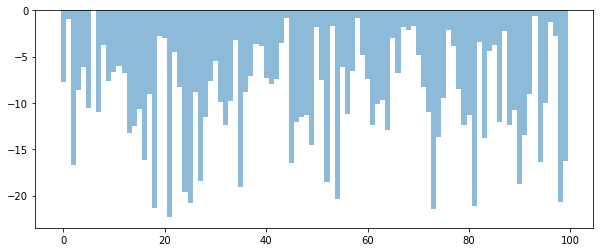

In [112]:
deficit = df_waterdeficit[
    df_waterdeficit.pheno == '"grainFill"'].groupby('cvar').mean()['water_deficit']

fig = plt.figure(figsize=(10,4))
plt.bar(deficit.index, deficit, width=1, alpha=0.5)

In [ ]:
%%time
fpath_db = '/home/disk/eos8/ach315/upscale/db/present_copy.db'
phenos = np.arange(100).tolist()
query, results, df = query_waterpotential(fpath_db, phenos, time=5)
#df.to_csv('/home/disk/eos8/ach315/ideotype/sims_waterdeficit.csv', index=False)

In [2]:
# Parameters
run_name = 'present'
n_pheno = 5
w_yield = 1
w_disp = 1
site_threshold = 5

# Identify top phenotypes
list_top_pheno = prevalent_top_pheno(run_name, n_pheno, w_yield, w_disp, site_threshold)

# Query top pheno data
fpath_db = '/home/disk/eos8/ach315/upscale/db/present.db'
phenos = list_top_pheno
query, results, df_pheno = query_pheno(fpath_db, phenos)

<BarContainer object of 13 artists>

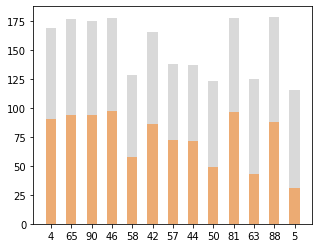

In [4]:
# Group output by phenotypes and pheno stages
df_pheno_grouped = df_pheno.groupby(['cvar', 'pheno']).mean().reset_index()
pheno_season_len = df_pheno_grouped.groupby('cvar').sum().pheno_days
pheno_season_len_sorted = [pheno_season_len[pheno] for pheno in list_top_pheno]

# Fetch pheno stage length of specified stage
pheno_stage = '"grainFill"'
pheno_days = []
for pheno in list_top_pheno:
    pheno_day = df_pheno_grouped[
        (df_pheno_grouped.pheno == pheno_stage) & 
        (df_pheno_grouped.cvar == pheno)].pheno_days.values.item()
    pheno_days.append(pheno_day)

# Turn top pheno list into string for plotting purposes
phenos_str = [str(pheno) for pheno in list_top_pheno]

# Visualization
fig = plt.figure(figsize=(5,4))
ax = fig.add_subplot(1,1,1)
ax.bar(phenos_str, pheno_season_len_sorted, width=0.5, color='#d9d9d9')
ax.bar(phenos_str, pheno_days, width=0.5, color='tab:orange', alpha=0.5)

In [81]:
df = pd.read_csv('/home/disk/eos8/ach315/upscale/sims/present/'
                 '1990/var_35/out1_724560_1990_var_35.txt', sep=',')
cols = ['date', 'jday', 'time',
        'leaves', 'mature_lvs', 'drop_lvs', 'LA', 'LA_dead', 'LAI',
        'RH', 'leaf_WP', 'PFD', 'Solrad',
        'temp_soil', 'temp_air', 'temp_can',
        'ET_dmd', 'ET_suply', 'Pn', 'Pg', 'resp', 'av_gs',
        'LAI_sunlit', 'LAI_shaded',
        'PFD_sunlit', 'PFD_shaded',
        'An_sunlit', 'An_shaded',
        'Ag_sunlit', 'Ag_shaded',
        'gs_sunlit', 'gs_shaded',
        'VPD', 'N', 'N_dmd', 'N_upt', 'N_leaf', 'PCRL',
        'dm_total', 'dm_shoot', 'dm_ear', 'dm_totleaf',
        'dm_dropleaf', 'df_stem', 'df_root',
        'roil_rt', 'mx_rootdept',
        'available_water', 'soluble_c', 'note']
df.columns = cols
phenos = [item.strip() for item in df.note]
df.note = phenos

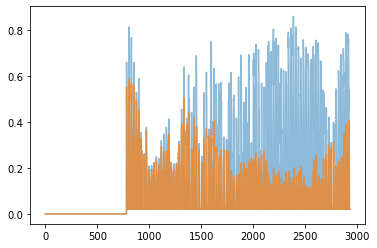

In [40]:
#plt.plot(df.av_gs, alpha=0.5)
plt.plot(df.gs_sunlit, alpha=0.5)
plt.plot(df.gs_shaded, alpha=0.7)

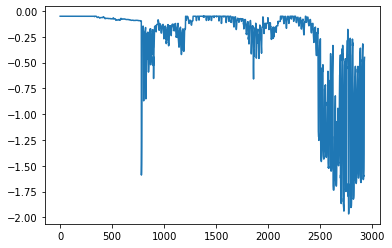

In [66]:
plt.plot(df.leaf_WP)

In [85]:
set(df.note)

{'"Emerged"',
 '"Germinated"',
 '"Matured"',
 '"Silked"',
 '"Tasseled"',
 '"Tasselinit"',
 '"grainFill"',
 '"none"'}

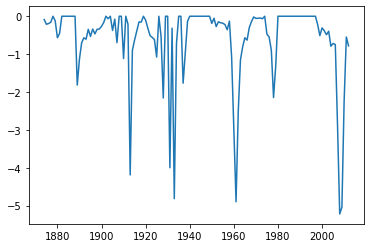

In [91]:
# Demand greater than supply towards end of growing season
df_grainfill = df[df.note == '"Tasseled"']
plt.plot(df_grainfill['ET_suply'] - df_grainfill['ET_dmd'])

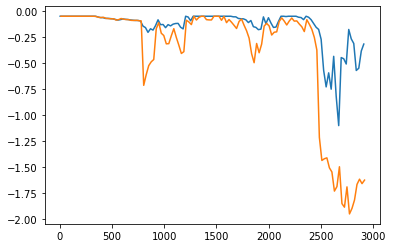

In [102]:
plt.plot(df[df.time == 5]['leaf_WP'])
plt.plot(df[df.time == 12]['leaf_WP'])

In [104]:
df_dawn = df[df.time == 5]
df_noon = df[df.time == 12]

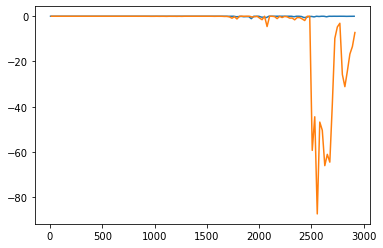

In [106]:
plt.plot(df_dawn['ET_suply'] - df_dawn['ET_dmd'])
plt.plot(df_noon['ET_suply'] - df_noon['ET_dmd'])

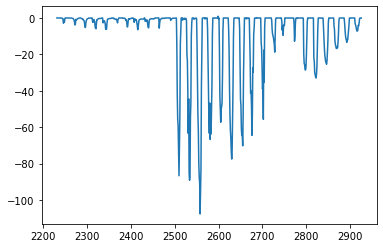

In [84]:
# Demand greater than supply towards end of growing season
df_grainfill = df[df.note == '"grainFill"']
plt.plot(df_grainfill['ET_suply'] - df_grainfill['ET_dmd'])

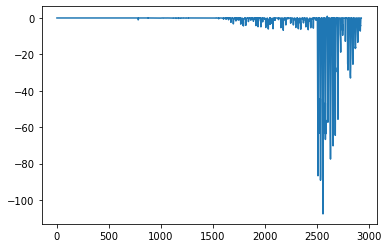

In [92]:
plt.plot(df['ET_suply'] - df['ET_dmd'])

In [64]:
df[2000:2050][['time', 'av_gs', 'leaf_WP', 'note']]

,time,av_gs,leaf_WP,note
2000,8,0.3055,-0.0916,"""Tasseled"""
2001,9,0.3499,-0.1046,"""Tasseled"""
2002,10,0.3802,-0.1170,"""Tasseled"""
2003,11,0.3682,-0.1338,"""Tasseled"""
2004,12,0.3264,-0.1442,"""Tasseled"""
2005,13,0.3487,-0.1583,"""Tasseled"""
2006,14,0.2868,-0.1745,"""Tasseled"""
2007,15,0.1878,-0.1793,"""Tasseled"""
2008,16,0.1295,-0.1749,"""Tasseled"""
2009,17,0.0540,-0.1674,"""Tasseled"""


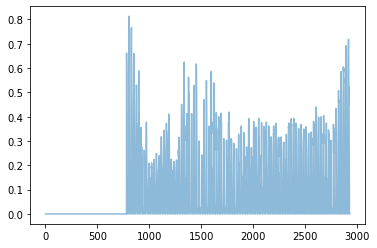

In [41]:
plt.plot(df.av_gs, alpha=0.5)

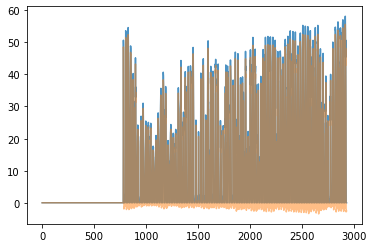

In [51]:
plt.plot(df.Ag_sunlit, alpha=0.8)
plt.plot(df.An_sunlit, alpha=0.5)

#plt.plot(df.An_shaded, alpha=0.7)